# Introduction

The goal of today's class is the implementation of the community detection techniques we have seen so far.

The structure of the following analyses can be used as an inspiration for the project. However, some passages must be added on your own. Please refer to the next section for this week's guided list of tasks for the project.

Note that this week's requests for the project are part of the second report.

# Project (week 6)

0) Treat your graph as undirected and unweighted. Delete loops and work on the resulting largest connected component.

1) Implement the following three techniques for community detection: 

a) Bridge removal (pick the partition with the highest modularity), 
b) Modularity optimization,
c) Label propagation. 

In this case, you are allowed to use built-in functions from NetworkX. 

2) Compare the results of each technique in terms of: a) number of detected clusters, b) cluster size distribution, c) computational time, e) modularity, f) other aspects you consider relevant, if any. Results should be presented in a table.

3) Give an interpretation to the differences and similarities between the three resulting partitions, and discuss which one you think is the best and why.

4) Provide a visualization for the partition you decided to be the best using Gephi.

5) Optional: for each pair of partitions compute the NMI between them and discuss.

# 0) Example graph: SNA aperitivo

In [34]:
# Import packages
import random 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 

The number of nodes in the graph is 68.


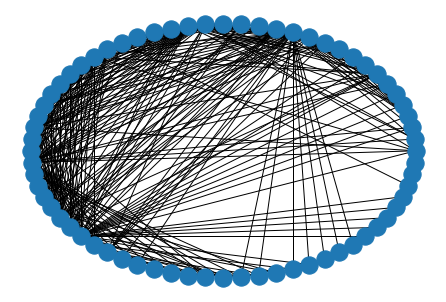

In [35]:
# Edge list for the aperitivo network
sna_ape = [('Wang', 'Akgun'), ('Wang', 'Kmoch'), ('Wang', 'Neuhaus'), ('Kmoch', 'Akgun'), ('Kmoch', 'Cuesta'), ('Kmoch', 'Mathis'), ('Kmoch', 'Meli'), ('Kmoch', 'Neuhaus'), ('Kmoch', 'Pisano'), ('Kmoch', 'Wang'), ('Neuhaus', 'Akgun'), ('Neuhaus', 'Cagnucci'), ('Neuhaus', 'Vasquez'), ('Neuhaus', 'Iavorskii'), ('Neuhaus', 'Kmoch'), ('Neuhaus', 'Kottage'), ('Neuhaus', 'Don'), ('Neuhaus', 'Meli'), ('Neuhaus', 'Pisano'), ('Neuhaus', 'Presaghi'), ('Neuhaus', 'Regragui'), ('Neuhaus', 'Wang'), ('Danish', 'Tabarani'), ('Di Nallo', 'Allam'), ('Di Nallo', 'Cervelli'), ('Di Nallo', 'Pinna'), ('Di Nallo', 'Presciutti'), ('Di Nallo', 'Salerno'), ('Allam', 'Abboud'), ('Allam', 'Akgun'), ('Allam', 'Azzi'), ('Allam', 'Baldoni'), ('Allam', 'Bruni'), ('Allam', 'Cervelli'), ('Allam', 'CocciÃ²'), ('Allam', 'Di'), ('Allam', 'Nallo'), ('Allam', 'Filosofi'), ('Allam', 'Kottage'), ('Allam', 'Don'), ('Allam', 'Pinna'), ('Allam', 'Pisano'), ('Allam', 'Salerno'), ('Allam', 'Sebastiani'), ('Allam', 'Torella'), ('Allam', 'Turco'), ('Allam', 'Wang'), ('Cervelli', 'Abboud'), ('Cervelli', 'Akgun'), ('Cervelli', 'Allam'), ('Cervelli', 'Andrijasevic'), ('Cervelli', 'Azzi'), ('Cervelli', 'Baldoni'), ('Cervelli', 'Benvenuti'), ('Cervelli', 'Brown'), ('Cervelli', 'Bruni'), ('Cervelli', 'Cagnucci'), ('Cervelli', 'Vasquez'), ('Cervelli', 'Cakmak'), ('Cervelli', 'Ceccarelli'), ('Cervelli', 'CocciÃ²'), ('Cervelli', 'Contino'), ('Cervelli', 'Cuesta'), ('Cervelli', 'Mathis'), ('Cervelli', 'Di'), ('Cervelli', 'Nallo'), ('Cervelli', 'Filosofi'), ('Cervelli', 'Kottage'), ('Cervelli', 'Don'), ('Cervelli', 'Laterza'), ('Cervelli', 'Pinna'), ('Cervelli', 'Pisano'), ('Cervelli', 'Presaghi'), ('Cervelli', 'Presciutti'), ('Cervelli', 'Regragui'), ('Cervelli', 'Salerno'), ('Cervelli', 'Sanna'), ('Cervelli', 'Sebastiani'), ('Cervelli', 'Tagliavini'), ('Cervelli', 'Torella'), ('Cervelli', 'Turco'), ('Azzi', 'Allam'), ('Azzi', 'Baldoni'), ('Azzi', 'Benvenuti'), ('Azzi', 'Brown'), ('Azzi', 'Bruni'), ('Azzi', 'Cervelli'), ('Azzi', 'CocciÃ²'), ('Azzi', 'Laterza'), ('Azzi', 'Pisano'), ('Azzi', 'Presaghi'), ('Azzi', 'Sanna'), ('Azzi', 'Sebastiani'), ('Azzi', 'Tabarani'), ('Azzi', 'Tagliavini'), ('Azzi', 'Torella'), ('Azzi', 'Turco'), ('Baldoni', 'Allam'), ('Baldoni', 'Aversa'), ('Baldoni', 'Baldoni'), ('Baldoni', 'Benvenuti'), ('Baldoni', 'Bruni'), ('Baldoni', 'Ceccarelli'), ('Baldoni', 'Cervelli'), ('Baldoni', 'CocciÃ²'), ('Baldoni', 'Contino'), ('Baldoni', 'Pinna'), ('Baldoni', 'Pisano'), ('Baldoni', 'Presaghi'), ('Baldoni', 'Regragui'), ('Baldoni', 'Salerno'), ('Baldoni', 'Sanna'), ('Baldoni', 'Sebastiani'), ('Baldoni', 'Tagliavini'), ('Baldoni', 'Torella'), ('Baldoni', 'Turco'), ('Baldoni', 'Wang'), ('Benvenuti', 'Akgun'), ('Benvenuti', 'Allam'), ('Benvenuti', 'Andrijasevic'), ('Benvenuti', 'Azzi'), ('Benvenuti', 'Baldoni'), ('Benvenuti', 'Benvenuti'), ('Benvenuti', 'Brown'), ('Benvenuti', 'Bruni'), ('Benvenuti', 'Cakmak'), ('Benvenuti', 'Ceccarelli'), ('Benvenuti', 'Cervelli'), ('Benvenuti', 'CocciÃ²'), ('Benvenuti', 'Contino'), ('Benvenuti', 'Danish'), ('Benvenuti', 'Di'), ('Benvenuti', 'Nallo'), ('Benvenuti', 'Fagnani'), ('Benvenuti', 'Farfan'), ('Benvenuti', 'Rodriguez'), ('Benvenuti', 'Filosofi'), ('Benvenuti', 'Goje'), ('Benvenuti', 'Kmoch'), ('Benvenuti', 'Kottage'), ('Benvenuti', 'Don'), ('Benvenuti', 'Laterza'), ('Benvenuti', 'Meli'), ('Benvenuti', 'Memedi'), ('Benvenuti', 'MIMUN'), ('Benvenuti', 'Pisano'), ('Benvenuti', 'Presaghi'), ('Benvenuti', 'Presciutti'), ('Benvenuti', 'Regragui'), ('Benvenuti', 'Sanna'), ('Benvenuti', 'Sebastiani'), ('Benvenuti', 'Tabarani'), ('Benvenuti', 'Tambini'), ('Benvenuti', 'Torella'), ('Benvenuti', 'Turco'), ('Benvenuti', 'Wang'), ('Benvenuti', 'Zannella'), ('Brown', 'El'), ('Brown', 'Arrag'), ('Bruni', 'Baldoni'), ('Bruni', 'Benvenuti'), ('Bruni', 'Sanna'), ('Contino', 'Azzi'), ('Contino', 'Baldoni'), ('Contino', 'Bruni'), ('Contino', 'Ceccarelli'), ('Contino', 'CocciÃ²'), ('Contino', 'Contino'), ('Contino', 'Di'), ('Contino', 'Nallo'), ('Contino', 'Filosofi'), ('Contino', 'Laterza'), ('Contino', 'Mancini'), ('Contino', 'Presaghi'), ('Contino', 'Regragui'), ('Contino', 'Sebastiani'), ('Contino', 'Tagliavini'), ('Contino', 'Turco'), ('Contino', 'Zannella'), ('Filosofi', 'Kottage'), ('Filosofi', 'Don'), ('Laterza', 'Abboud'), ('Laterza', 'Azzi'), ('Laterza', 'Baldoni'), ('Laterza', 'Benvenuti'), ('Laterza', 'Bruni'), ('Laterza', 'Ceccarelli'), ('Laterza', 'Cervelli'), ('Laterza', 'CocciÃ²'), ('Laterza', 'Contino'), ('Laterza', 'Di'), ('Laterza', 'Nallo'), ('Laterza', 'Fagnani'), ('Laterza', 'Filosofi'), ('Laterza', 'Kottage'), ('Laterza', 'Don'), ('Laterza', 'Pisano'), ('Laterza', 'Presaghi'), ('Laterza', 'Regragui'), ('Laterza', 'Sanna'), ('Laterza', 'Sebastiani'), ('Laterza', 'Tabarani'), ('Laterza', 'Tagliavini'), ('Laterza', 'Torella'), ('Laterza', 'Turco'), ('Laterza', 'Zannella'), ('Pisano', 'Tagliavini'), ('Presaghi', 'Akgun'), ('Presaghi', 'Allam'), ('Presaghi', 'Azzi'), ('Presaghi', 'Baldoni'), ('Presaghi', 'Benvenuti'), ('Presaghi', 'Brown'), ('Presaghi', 'Bruni'), ('Presaghi', 'Ceccarelli'), ('Presaghi', 'Cervelli'), ('Presaghi', 'CocciÃ²'), ('Presaghi', 'Contino'), ('Presaghi', 'Cuesta'), ('Presaghi', 'Mathis'), ('Presaghi', 'Danish'), ('Presaghi', 'Di'), ('Presaghi', 'Nallo'), ('Presaghi', 'El'), ('Presaghi', 'Arrag'), ('Presaghi', 'Fagnani'), ('Presaghi', 'Farfan'), ('Presaghi', 'Rodriguez'), ('Presaghi', 'Filosofi'), ('Presaghi', 'Formaro'), ('Presaghi', 'Iavorskii'), ('Presaghi', 'Jelusic'), ('Presaghi', 'Kmoch'), ('Presaghi', 'Kottage'), ('Presaghi', 'Don'), ('Presaghi', 'Krasnokutskii'), ('Presaghi', 'Laterza'), ('Presaghi', 'Meli'), ('Presaghi', 'Neuhaus'), ('Presaghi', 'Pisano'), ('Presaghi', 'Presaghi'), ('Presaghi', 'Regragui'), ('Presaghi', 'Sanna'), ('Presaghi', 'Sasso'), ('Presaghi', 'Tagliavini'), ('Presaghi', 'Turco'), ('Presaghi', 'Venel'), ('Sanna', 'Allam'), ('Sanna', 'Azzi'), ('Sanna', 'Baldoni'), ('Sanna', 'Benvenuti'), ('Sanna', 'Bruni'), ('Sanna', 'Ceccarelli'), ('Sanna', 'Cervelli'), ('Sanna', 'CocciÃ²'), ('Sanna', 'Fagnani'), ('Sanna', 'Filosofi'), ('Sanna', 'Laterza'), ('Sanna', 'Pisano'), ('Sanna', 'Presaghi'), ('Sanna', 'Regragui'), ('Sanna', 'Sebastiani'), ('Sanna', 'Tabarani'), ('Sanna', 'Tagliavini'), ('Sanna', 'Torella'), ('Sanna', 'Turco'), ('Sebastiani', 'Sanna'), ('Tagliavini', 'Allam'), ('Tagliavini', 'Azzi'), ('Tagliavini', 'Baldoni'), ('Tagliavini', 'Baranes'), ('Tagliavini', 'Benvenuti'), ('Tagliavini', 'Brown'), ('Tagliavini', 'Bruni'), ('Tagliavini', 'Cagnucci'), ('Tagliavini', 'Vasquez'), ('Tagliavini', 'Cakmak'), ('Tagliavini', 'Ceccarelli'), ('Tagliavini', 'Cervelli'), ('Tagliavini', 'CocciÃ²'), ('Tagliavini', 'Contino'), ('Tagliavini', 'Cuesta'), ('Tagliavini', 'Mathis'), ('Tagliavini', 'Desideri'), ('Tagliavini', 'Di'), ('Tagliavini', 'Nallo'), ('Tagliavini', 'Fagnani'), ('Tagliavini', 'Farfan'), ('Tagliavini', 'Rodriguez'), ('Tagliavini', 'Filosofi'), ('Tagliavini', 'Jelusic'), ('Tagliavini', 'Kmoch'), ('Tagliavini', 'Kochai'), ('Tagliavini', 'Laterza'), ('Tagliavini', 'Mancini'), ('Tagliavini', 'Meli'), ('Tagliavini', 'Memedi'), ('Tagliavini', 'Neuhaus'), ('Tagliavini', 'Pinna'), ('Tagliavini', 'Pisano'), ('Tagliavini', 'Pizzuto'), ('Tagliavini', 'Allende'), ('Tagliavini', 'Presaghi'), ('Tagliavini', 'Regragui'), ('Tagliavini', 'Sebastiani'), ('Tagliavini', 'Tabarani'), ('Tagliavini', 'Tambini'), ('Tagliavini', 'Torella'), ('Tagliavini', 'Turco'), ('Tagliavini', 'Wang'), ('Tagliavini', 'Zannella'), ('Torella', 'Allam'), ('Torella', 'Azzi'), ('Torella', 'Baldoni'), ('Torella', 'Benvenuti'), ('Torella', 'Bruni'), ('Torella', 'Ceccarelli'), ('Torella', 'Cervelli'), ('Torella', 'CocciÃ²'), ('Torella', 'Fagnani'), ('Torella', 'Filosofi'), ('Torella', 'Kottage'), ('Torella', 'Don'), ('Torella', 'Laterza'), ('Torella', 'Pinna'), ('Torella', 'Pisano'), ('Torella', 'Presaghi'), ('Torella', 'Regragui'), ('Torella', 'Salerno'), ('Torella', 'Sanna'), ('Torella', 'Sebastiani'), ('Torella', 'Tabarani'), ('Torella', 'Tambini'), ('Torella', 'Turco'), ('Torella', 'Wang'), ('Chisenga', 'Abboud'), ('Krasnokutskii', 'Krasnokutskii'), ('Fagnani', 'Allam'), ('Fagnani', 'Benvenuti'), ('Fagnani', 'El'), ('Fagnani', 'Arrag'), ('Fagnani', 'Farfan'), ('Fagnani', 'Rodriguez'), ('Fagnani', 'Kottage'), ('Fagnani', 'Don'), ('Fagnani', 'Laterza'), ('Fagnani', 'Regragui'), ('Fagnani', 'Tambini'), ('Fagnani', 'Torella'), ('Memedi', 'El'), ('Memedi', 'Arrag'), ('Memedi', 'Farfan'), ('Memedi', 'Rodriguez'), ('Aversa', 'Formaro'), ('Bernardini', 'Augello'), ('Bernardini', 'Desideri')]
# Build the graph from the edge list
G_SNA = nx.from_edgelist(sna_ape)

# Number of nodes
N_SNA = G_SNA.number_of_nodes()
print('The number of nodes in the graph is ' + str(N_SNA) + '.')

# Circular plot
nx.draw_circular(G_SNA)   

Let's verify whether the graph is connected or not. If it's not, we're gonna restrict ourselves to the largest connected component.

In [36]:
# Is the graph connected?
print(nx.is_connected(G_SNA))

True


In this case, we also need to remove self-loops.

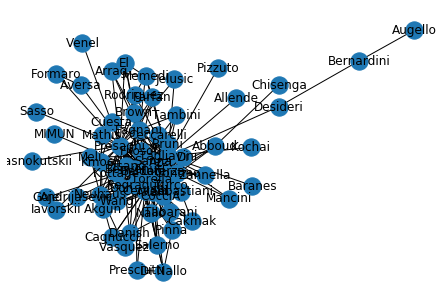

In [37]:
# Remove self-loops
G_SNA.remove_edges_from(nx.selfloop_edges(G_SNA))

# Plot the resulting graph
nx.draw(G_SNA,with_labels='True')   

# 1) Community detection

### Bridge removal

We implement the bridge removal method using the Girvan-Newman algorithm. Since this returns a hierarchy of partitions, we select the one maximizing the modularity.

In [38]:
# Girvan-Newman algorithm
partitions = nx.community.girvan_newman(G_SNA)   

# Compute the modularity of each partition
for partition in partitions:
    modularity = nx.community.quality.modularity(G_SNA, partition)
    print(modularity)
    print(partition)

0.013151068972748554
({'Vasquez', 'Mancini', 'Pinna', 'Meli', 'Don', 'Allende', 'Akgun', 'Ceccarelli', 'Abboud', 'Nallo', 'Mathis', 'Filosofi', 'Tambini', 'Venel', 'Sebastiani', 'Iavorskii', 'Arrag', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Jelusic', 'Benvenuti', 'Turco', 'Goje', 'Formaro', 'Salerno', 'Allam', 'Sasso', 'Rodriguez', 'Sanna', 'El', 'Tagliavini', 'Brown', 'Farfan', 'Cagnucci', 'Baldoni', 'Danish', 'Fagnani', 'CocciÃ²', 'Wang', 'Di Nallo', 'Di', 'Cervelli', 'Kochai', 'Kottage', 'Presciutti', 'Torella', 'Baranes', 'Andrijasevic', 'Kmoch', 'Presaghi', 'Laterza', 'Memedi', 'MIMUN', 'Regragui', 'Bruni', 'Zannella', 'Chisenga', 'Cuesta', 'Aversa', 'Neuhaus', 'Cakmak', 'Pizzuto', 'Krasnokutskii'}, {'Augello', 'Desideri', 'Bernardini'})
0.019596913941347115
({'Vasquez', 'Mancini', 'Pinna', 'Meli', 'Don', 'Allende', 'Akgun', 'Ceccarelli', 'Abboud', 'Nallo', 'Mathis', 'Filosofi', 'Tambini', 'Venel', 'Sebastiani', 'Iavorskii', 'Arrag', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Jelu

0.017715036257877903
({'Vasquez', 'Pinna', 'Meli', 'Don', 'Akgun', 'Ceccarelli', 'Abboud', 'Nallo', 'Filosofi', 'Mathis', 'Tambini', 'Sebastiani', 'Arrag', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Jelusic', 'Benvenuti', 'Turco', 'Salerno', 'Allam', 'Rodriguez', 'Tagliavini', 'Brown', 'Farfan', 'Cagnucci', 'Baldoni', 'Danish', 'Fagnani', 'CocciÃ²', 'Wang', 'Di Nallo', 'Di', 'Cervelli', 'Andrijasevic', 'Kottage', 'Presciutti', 'Torella', 'Kmoch', 'Presaghi', 'Laterza', 'Memedi', 'Regragui', 'Bruni', 'Zannella', 'Cuesta', 'Neuhaus', 'Cakmak', 'Sanna'}, {'Iavorskii'}, {'Formaro', 'Aversa'}, {'Goje'}, {'MIMUN'}, {'El'}, {'Mancini'}, {'Krasnokutskii'}, {'Sasso'}, {'Venel'}, {'Baranes'}, {'Augello', 'Desideri', 'Bernardini'}, {'Kochai'}, {'Pizzuto'}, {'Allende'}, {'Chisenga'})
0.01703071710025271
({'Vasquez', 'Pinna', 'Meli', 'Don', 'Akgun', 'Ceccarelli', 'Abboud', 'Nallo', 'Filosofi', 'Mathis', 'Tambini', 'Sebastiani', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Jelusic', 'Benvenuti', 'Turco'

0.02352071169192392
({'Pinna', 'Meli', 'Don', 'Akgun', 'Ceccarelli', 'Nallo', 'Filosofi', 'Mathis', 'Sebastiani', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Benvenuti', 'Turco', 'Salerno', 'Allam', 'Rodriguez', 'Tagliavini', 'Brown', 'Baldoni', 'Fagnani', 'CocciÃ²', 'Wang', 'Di', 'Cervelli', 'Kottage', 'Torella', 'Kmoch', 'Presaghi', 'Laterza', 'Regragui', 'Bruni', 'Cuesta', 'Neuhaus', 'Cakmak', 'Sanna'}, {'Cagnucci'}, {'Vasquez'}, {'Iavorskii'}, {'Danish'}, {'Presciutti', 'Di Nallo'}, {'Abboud'}, {'Andrijasevic'}, {'Formaro', 'Aversa'}, {'Farfan'}, {'Goje'}, {'Memedi'}, {'MIMUN'}, {'Tambini'}, {'Zannella'}, {'El'}, {'Arrag'}, {'Mancini'}, {'Jelusic'}, {'Krasnokutskii'}, {'Sasso'}, {'Venel'}, {'Baranes'}, {'Augello', 'Desideri', 'Bernardini'}, {'Kochai'}, {'Pizzuto'}, {'Allende'}, {'Chisenga'})
0.024635489674506912
({'Pinna', 'Meli', 'Don', 'Akgun', 'Ceccarelli', 'Nallo', 'Filosofi', 'Mathis', 'Sebastiani', 'Pisano', 'Tabarani', 'Azzi', 'Contino', 'Benvenuti', 'Turco', 'Allam', 'Rodrigu

0.011848655092107122
({'Wang'}, {'Akgun'}, {'Kmoch'}, {'Neuhaus'}, {'Cuesta'}, {'Mathis'}, {'Meli'}, {'Don', 'Ceccarelli', 'Filosofi', 'Sebastiani', 'Pisano', 'Azzi', 'Contino', 'Benvenuti', 'Turco', 'Allam', 'Tagliavini', 'Baldoni', 'Fagnani', 'CocciÃ²', 'Cervelli', 'Torella', 'Presaghi', 'Laterza', 'Regragui', 'Bruni', 'Sanna'}, {'Cagnucci'}, {'Vasquez'}, {'Iavorskii'}, {'Kottage'}, {'Danish'}, {'Tabarani'}, {'Presciutti', 'Di Nallo'}, {'Pinna'}, {'Salerno'}, {'Abboud'}, {'Di'}, {'Nallo'}, {'Andrijasevic'}, {'Brown'}, {'Cakmak'}, {'Formaro', 'Aversa'}, {'Farfan'}, {'Rodriguez'}, {'Goje'}, {'Memedi'}, {'MIMUN'}, {'Tambini'}, {'Zannella'}, {'El'}, {'Arrag'}, {'Mancini'}, {'Jelusic'}, {'Krasnokutskii'}, {'Sasso'}, {'Venel'}, {'Baranes'}, {'Augello', 'Desideri', 'Bernardini'}, {'Kochai'}, {'Pizzuto'}, {'Allende'}, {'Chisenga'})
0.00568426397059633
({'Wang'}, {'Akgun'}, {'Kmoch'}, {'Neuhaus'}, {'Cuesta'}, {'Mathis'}, {'Meli'}, {'Ceccarelli', 'Filosofi', 'Sebastiani', 'Pisano', 'Azzi', 'Co

The selection of the partition with the highest modularity is left as a simple exercise for you to do. Note that, once you have selected the partition, it may be convenient to transform it to a list of frozensets (see below the result of Modularity optimization).

### Modularity optimization

Here, we directly maximize the modularity, and to do so we employ Newman's greedy algorithm.

In [17]:
# Modularity optimization
partition_mod = nx.community.greedy_modularity_communities(G_SNA)
print(partition_mod)

[frozenset({'Pinna', 'Abboud', 'Ceccarelli', 'Nallo', 'Sebastiani', 'Pisano', 'Azzi', 'Contino', 'Turco', 'Salerno', 'Allam', 'Baldoni', 'Di Nallo', 'CocciÃ²', 'Di', 'Cervelli', 'Presciutti', 'Torella', 'Laterza', 'Regragui', 'Bruni', 'Chisenga', 'Sanna'}), frozenset({'Kmoch', 'Presaghi', 'Cagnucci', 'Iavorskii', 'Vasquez', 'Meli', 'Jelusic', 'Akgun', 'Wang', 'Formaro', 'Cuesta', 'Aversa', 'Neuhaus', 'Mathis', 'Sasso', 'Venel', 'Krasnokutskii'}), frozenset({'Tagliavini', 'Farfan', 'Memedi', 'Arrag', 'Pizzuto', 'Augello', 'Mancini', 'Bernardini', 'Allende', 'Fagnani', 'Baranes', 'Kochai', 'Brown', 'Desideri', 'Rodriguez', 'Tambini', 'El'}), frozenset({'Danish', 'Tabarani', 'Don', 'MIMUN', 'Goje', 'Benvenuti', 'Zannella', 'Andrijasevic', 'Kottage', 'Filosofi', 'Cakmak'})]


The result is a list of frozensets, which are immutable sets. The difference between a frozenset and a set is similar to that between a tuple and a list. Both frozensets and sets are not ordered. Frozensets come in handy when representing communities, because their members are immutable (once we have termined the community detection task) and not ordered.

In the specific case, each element in the list (i.e., each frozenset) is a different community.

### Label propagation

In [18]:
communities = nx.community.asyn_lpa_communities(G_SNA)
partition_lp = [frozenset(c) for c in communities]
print(partition_lp)

[frozenset({'Mancini', 'Meli', 'Don', 'Akgun', 'Mathis', 'Tambini', 'Desideri', 'Tabarani', 'Allam', 'Rodriguez', 'Sanna', 'El', 'Tagliavini', 'Cagnucci', 'Baldoni', 'Danish', 'Fagnani', 'Di Nallo', 'Di', 'Cervelli', 'Andrijasevic', 'Kmoch', 'Presaghi', 'Laterza', 'Memedi', 'MIMUN', 'Regragui', 'Chisenga', 'Aversa', 'Neuhaus', 'Cakmak', 'Brown', 'Krasnokutskii', 'Vasquez', 'Augello', 'Pinna', 'Allende', 'Abboud', 'Ceccarelli', 'Nallo', 'Filosofi', 'Venel', 'Sebastiani', 'Iavorskii', 'Arrag', 'Pisano', 'Azzi', 'Contino', 'Goje', 'Jelusic', 'Turco', 'Benvenuti', 'Formaro', 'Bernardini', 'Salerno', 'Sasso', 'Farfan', 'CocciÃ²', 'Wang', 'Kochai', 'Kottage', 'Presciutti', 'Torella', 'Baranes', 'Bruni', 'Zannella', 'Cuesta', 'Pizzuto'})]


In the case of label propagation, the result is an iterable of communities, so we have to change it a bit to get a list of frozensets again.

# 2) Results comparison

Compute the number of detected clusters, the cluster size distribution, the computational time required by the techniques you used, and the modularity.


You can also add as an additional information, the NetworkX's function partition_quality(). Take a look at its help page to see how it works, and freely decide if you want to use it as an additional metric or not.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html

Once you have computed the requested features for all methods, build a table summarizing them. Rows would be the method, columns would be the features. Tables can be generated with any tool you prefer, and then included in the Jupyter file in the form of an image (please note that you can only insert images in Markdown cells).

# 3) Interpretation

The interpretation of the results and your choice of the best partition should take into account the properties of each method. As Example:
- the difference between the label propagation and the other two (if these are similar) may be motivated by the instabilities of the former. 
- Label propagation is expected to be faster than the alternatives, so you may check and comment on whether this happens or not. Or if it is necessary based on the size of your network?
- A final example is wondering if the Newman's greedy algorithm got stuck in a local maximum or not, or checking if its resulting partition is unbalanced or not. 

Please note that these are only suggestions, so the list is neither mandatory nor exhaustive.

# 4) Visualization

a) Visualization in Jupyter

To visualize the partitions, we create a partition map, i.e., a dictionary mapping node names to a partition index. Let's do that for the modularity optimization partition, which we take as an example.

In [41]:
# Partition map for the modularity optimization partition
partition_map = {}
for idx, cluster_nodes in enumerate(partition_mod):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{'Pinna': 0,
 'Abboud': 0,
 'Ceccarelli': 0,
 'Nallo': 0,
 'Sebastiani': 0,
 'Pisano': 0,
 'Azzi': 0,
 'Contino': 0,
 'Turco': 0,
 'Salerno': 0,
 'Allam': 0,
 'Baldoni': 0,
 'Di Nallo': 0,
 'CocciÃ²': 0,
 'Di': 0,
 'Cervelli': 0,
 'Presciutti': 0,
 'Torella': 0,
 'Laterza': 0,
 'Regragui': 0,
 'Bruni': 0,
 'Chisenga': 0,
 'Sanna': 0,
 'Kmoch': 1,
 'Presaghi': 1,
 'Cagnucci': 1,
 'Iavorskii': 1,
 'Vasquez': 1,
 'Meli': 1,
 'Jelusic': 1,
 'Akgun': 1,
 'Wang': 1,
 'Formaro': 1,
 'Cuesta': 1,
 'Aversa': 1,
 'Neuhaus': 1,
 'Mathis': 1,
 'Sasso': 1,
 'Venel': 1,
 'Krasnokutskii': 1,
 'Tagliavini': 2,
 'Farfan': 2,
 'Memedi': 2,
 'Arrag': 2,
 'Pizzuto': 2,
 'Augello': 2,
 'Mancini': 2,
 'Bernardini': 2,
 'Allende': 2,
 'Fagnani': 2,
 'Baranes': 2,
 'Kochai': 2,
 'Brown': 2,
 'Desideri': 2,
 'Rodriguez': 2,
 'Tambini': 2,
 'El': 2,
 'Danish': 3,
 'Tabarani': 3,
 'Don': 3,
 'MIMUN': 3,
 'Goje': 3,
 'Benvenuti': 3,
 'Zannella': 3,
 'Andrijasevic': 3,
 'Kottage': 3,
 'Filosofi': 3,
 'Cakmak': 3}

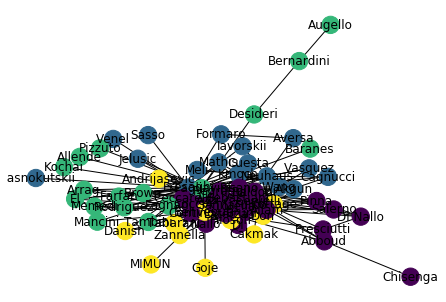

In [42]:
# Assign colors to each group
node_colors = [partition_map[n] for n in G_SNA.nodes]
  
# Draw the graph and the communities
nx.draw(G_SNA, node_color = node_colors, with_labels = True)

Of course, the aspect of the plot may improved in several ways. More information can be found at https://networkx.org/documentation/stable/reference/drawing.html and https://matplotlib.org/.

b) Visualization in Gephi

In the way, we have done communities are not part of the graph but outside (in the dictionnary partitions) so we can not export the communities in a format compatible with Gephi. In order to do so, we simply need to save the information as an attribute for each nodes. Lucklily, there is a function from networkx to do it.


In [44]:
nx.set_node_attributes(G_SNA,partition_map,'Community_mod')

Now, let's give a different color to each possible value in the partition map, and then plot the graph using these colors and the node labels.

In [45]:
nx.write_gexf(G_SNA, "test.gexf")

# 5) Optional

We have seen in class that NMI allows to evaluate how much information one partition contains with respect to another one. 

Since we do not know the real communities, we do not have a benchmark but it is still possible to use this index to compare the different results we have obtained by looking at the NMI for each pair of predicted partitions.

NMI can be computed by importing normalized_mutual_info_score from sklearn.metrics.cluster ('from sklearn.metrics.cluster import normalized_mutual_info_score').

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

You should create for each partition, a vector where the value corresponding to coordinate of node i is the community it is predicted to be part. Then, you can run NMI on each pair of vectors. Be careful that the nodes are in the same order for each vector.
